In [90]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

# Supervised model used
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import confusion_matrix,accuracy_score

%matplotlib inline

In [91]:
df = pd.read_csv("/kaggle/input/corona-virus-report/country_wise_latest.csv")

In [92]:
df.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

In [93]:
df.shape

(187, 15)

# What does your country tell about your Covid recovery?

In [94]:
df.rename(columns = {'Country/Region':'country'}, inplace = True)

In [96]:
# Dictionary of the countries and the mean of the Recovered cases there
df.groupby(['country']).mean()['Recovered'].sort_values().dropna().to_dict()

/tmp/ipykernel_32/1585764136.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['country']).mean()['Recovered'].sort_values().dropna().to_dict()


{'Canada': 0.0,
 'Syria': 0.0,
 'Serbia': 0.0,
 'Sweden': 0.0,
 'Mozambique': 0.0,
 'Timor-Leste': 0.0,
 'Western Sahara': 8.0,
 'Papua New Guinea': 11.0,
 'Holy See': 12.0,
 'Greenland': 13.0,
 'Saint Kitts and Nevis': 15.0,
 'Fiji': 18.0,
 'Dominica': 18.0,
 'Laos': 19.0,
 'Saint Lucia': 22.0,
 'Grenada': 23.0,
 'Belize': 26.0,
 'Seychelles': 39.0,
 'Saint Vincent and the Grenadines': 39.0,
 'Botswana': 63.0,
 'Antigua and Barbuda': 65.0,
 'Gambia': 66.0,
 'Liechtenstein': 81.0,
 'Bhutan': 86.0,
 'Bahamas': 91.0,
 'Barbados': 94.0,
 'Namibia': 101.0,
 'Monaco': 104.0,
 'Trinidad and Tobago': 128.0,
 'Lesotho': 128.0,
 'Brunei': 138.0,
 'Cambodia': 147.0,
 'Guyana': 181.0,
 'Tanzania': 183.0,
 'Netherlands': 189.0,
 'Eritrea': 191.0,
 'Mongolia': 222.0,
 'Angola': 242.0,
 'Burma': 292.0,
 'Burundi': 301.0,
 'Comoros': 328.0,
 'Mauritius': 332.0,
 'Vietnam': 365.0,
 'Taiwan*': 440.0,
 'Zimbabwe': 542.0,
 'Libya': 577.0,
 'Togo': 607.0,
 'Liberia': 646.0,
 'San Marino': 657.0,
 'Malta':

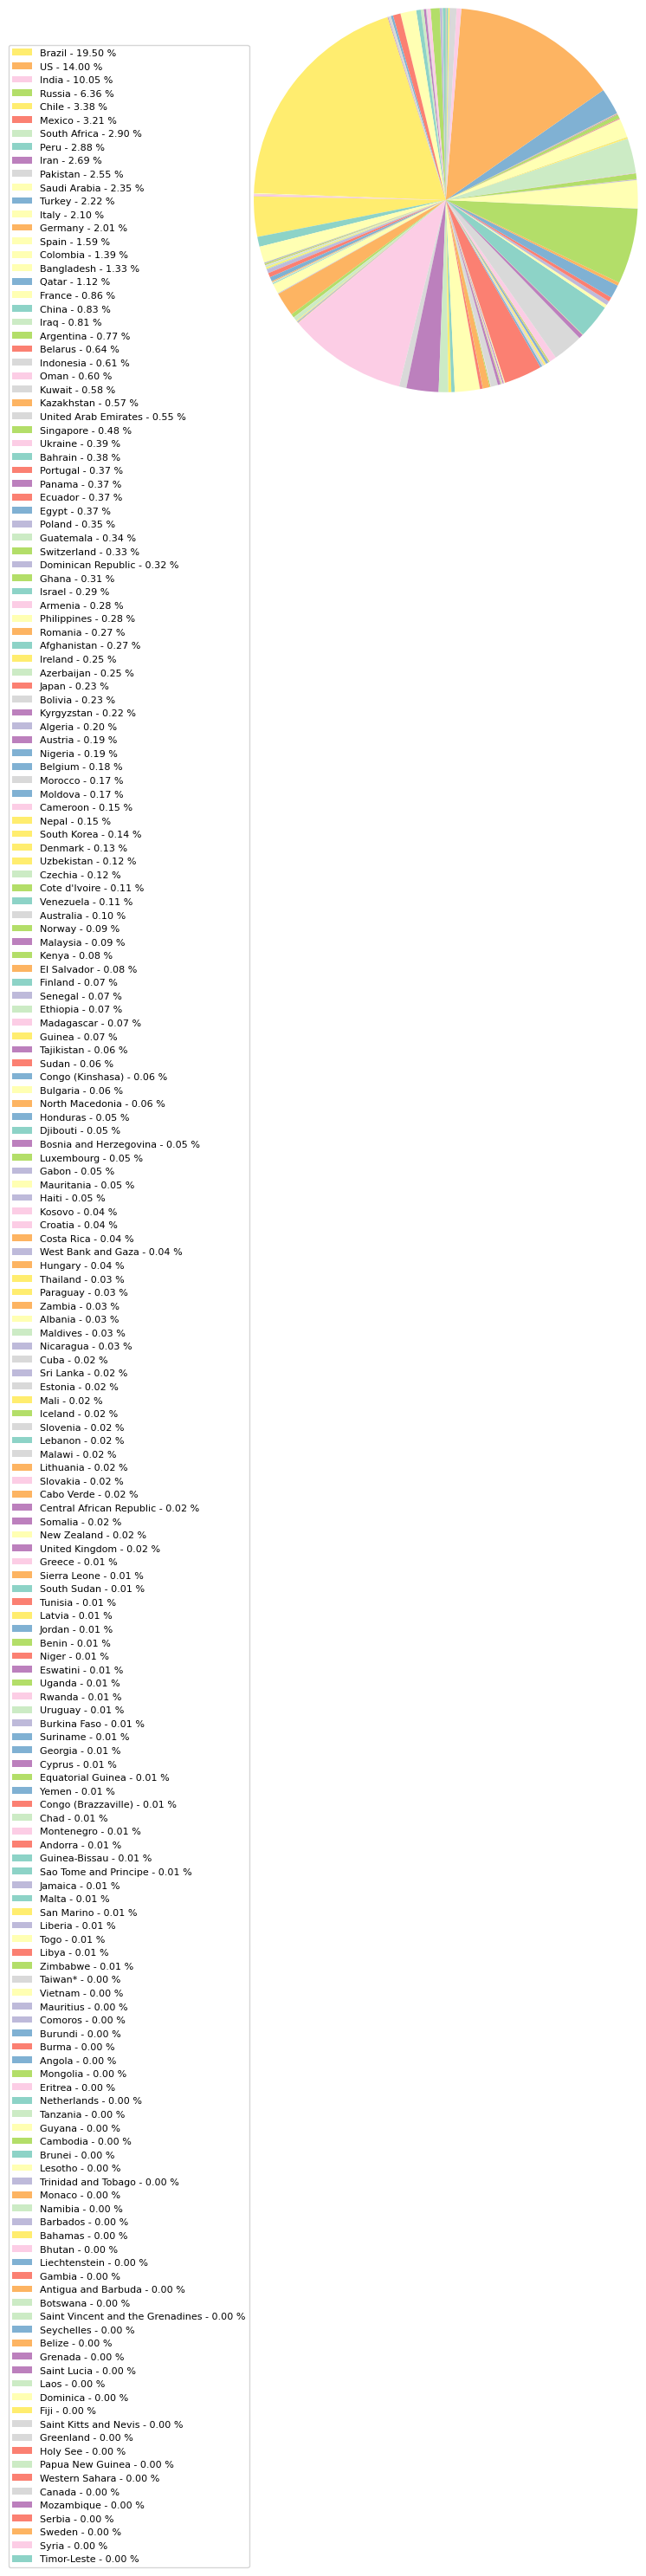

In [98]:
# pie chart that shows the percent of every countries recovery

x = df['country']
y = df['Recovered']
percent = (100*y)/y.sum()
colors=sns.color_palette("Set3")

patches, texts = plt.pie(y,colors=colors,startangle=90, radius=1.5)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, bbox_to_anchor=(-0.1, 1.),
           fontsize=8)


plt.show() 

# What does every continent tell about recovery?

In [99]:
df.groupby(['WHO Region']).mean()['Recovered'].sort_values().dropna().to_dict()

/tmp/ipykernel_32/2187082611.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['WHO Region']).mean()['Recovered'].sort_values().dropna().to_dict()


{'Africa': 9180.104166666666,
 'Western Pacific': 12923.125,
 'Europe': 35602.19642857143,
 'Eastern Mediterranean': 54609.09090909091,
 'South-East Asia': 115693.3,
 'Americas': 127674.74285714286}

In [100]:
continent_recovery_rate = { 
    "continent" : ["Africa","Western Pacific","Europe","Eastern Mediterranean","South-East Asia","Americas"],
    "Recovery_rate" : [9180.104167,12923.125000, 35602.196429,54609.090909, 115693.300000, 127674.742857]
}
data = pd.DataFrame(continent_recovery_rate)
# Americas are of highest recovery followed by South-East Asia

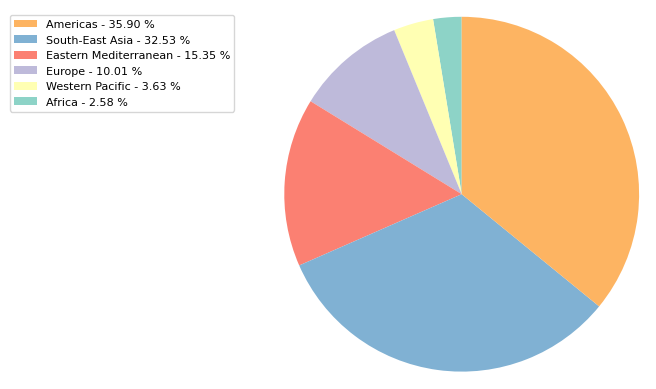

In [101]:
# pie chart that shows the percent of every countries recovery

x = data['continent']
y = data['Recovery_rate']
percent = (100*y)/y.sum()

colors=sns.color_palette("Set3")

patches, texts = plt.pie(y,colors=colors,startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]
sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),key=lambda x: x[2],reverse=True))

plt.legend(patches, labels, bbox_to_anchor=(-0.1, 1.),fontsize=8)


plt.show() 

# Is the death rate determined by to Region?

In [102]:
continent_death_rate = { 
    "continent" : ["Africa","Western Pacific","Europe","Eastern Mediterranean","South-East Asia","Americas"],
    "death_rate" : [2.306458,1.29, 4.198393,3.563182, 1.296, 3.052571]
}
data2 = pd.DataFrame(continent_death_rate)
# Americas are of highest recovery followed by South-East Asia

In [103]:
df.groupby(['WHO Region']).mean()['Deaths / 100 Cases'].sort_values().dropna()

/tmp/ipykernel_32/3741741684.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['WHO Region']).mean()['Deaths / 100 Cases'].sort_values().dropna()


WHO Region
Western Pacific          1.290000
South-East Asia          1.296000
Africa                   2.306458
Americas                 3.052571
Eastern Mediterranean    3.563182
Europe                   4.198393
Name: Deaths / 100 Cases, dtype: float64

<Axes: xlabel='continent'>

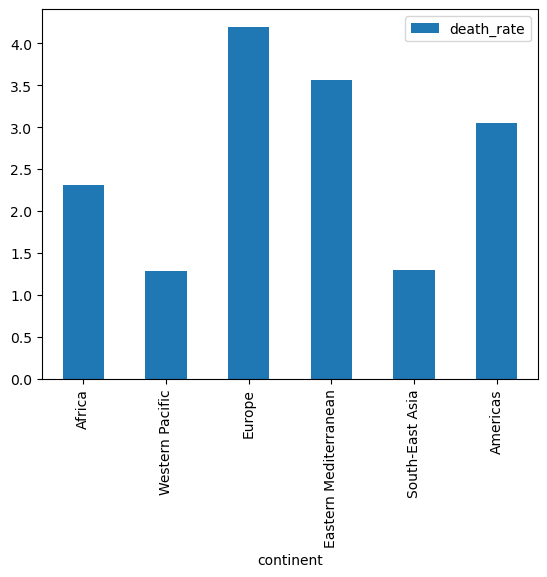

In [104]:
data2.plot(x='continent',y='death_rate',kind='bar')

# Is your country still infected?

In [105]:
df.groupby(['WHO Region']).mean()['Confirmed last week'].sort_values().dropna()

/tmp/ipykernel_32/2152063144.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['WHO Region']).mean()['Confirmed last week'].sort_values().dropna()


WHO Region
Africa                    12669.166667
Western Pacific           16647.437500
Europe                    56193.142857
Eastern Mediterranean     63583.954545
South-East Asia          147828.300000
Americas                 223291.371429
Name: Confirmed last week, dtype: float64

In [106]:
continent_infection_rate = { 
    "continent":["Africa","Western Pacific","Europe","Eastern Mediterranean","South-East Asia","Americas"],
    "infection_rate":[12669.166667,16647.437500,56193.142857, 63583.954545,147828.3,223291.371429]
}
data3 = pd.DataFrame(continent_infection_rate)
# Americas are of highest recovery followed by South-East Asia

<Axes: xlabel='continent'>

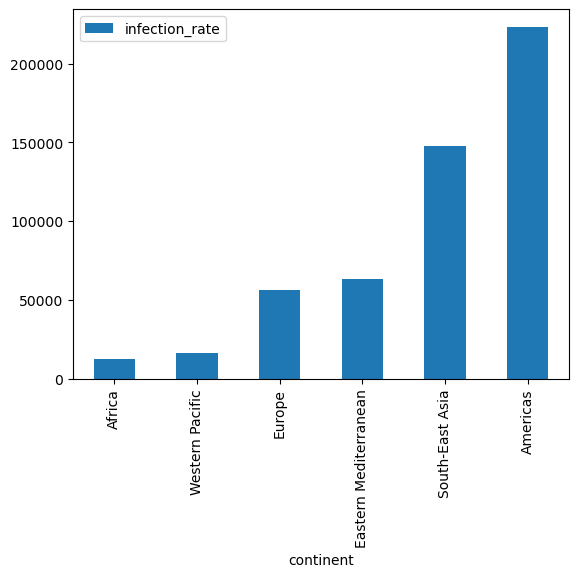

In [107]:
data3.plot(x ='continent',y='infection_rate',kind='bar')

# clean and prepare data

In [108]:
df = df.apply(LabelEncoder().fit_transform)


In [109]:
scaler = StandardScaler()
scaler.fit_transform(df)
df = pd.DataFrame(df)

In [110]:
df.head(2)

,country,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,0,133,109,133,127,44,10,13,96,83,96,134,78,22,2
1,1,89,66,83,83,46,6,27,83,58,98,85,77,122,3


# Can we predict the deaths of every country?

In [111]:
# split into label and data
x = df.drop(['Deaths'],axis=1)
y = df['Deaths']

# split the data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

# intanstiate the model
neigh = KNeighborsClassifier(n_neighbors=3)

neigh.fit(x_train, y_train)

y_pred = neigh.predict(x_test)

# scores
print('The r-squared score for the model was',"{:,.2f}".format(r2_score(y_test,y_pred)))
print('accuracy of model is',"{:,.2f}".format(accuracy_score(y_test,y_pred)*100),'%')

The r-squared score for the model was 0.78
accuracy of model is 10.53 %
